In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
#getting dataset basic informations

df= pd.read_csv("hotels.csv")

In [9]:
print("This is the first 5 rows of dataset = ", df.head())
print()
print("These are the columns names of the dataset =", df.columns)
print()
print("These are some informations about dataset =", df.info())

This is the first 5 rows of dataset =                                      Hotel name continent_name city_name  \
0                    Shangri-La Hotel, Beijing           Asia   Beijing   
1            InterContinental Beijing Sanlitun           Asia   Beijing   
2         Holiday Inn Express Beijing Yizhuang           Asia   Beijing   
3  Shangri-La China World Summit Wing, Beijing           Asia   Beijing   
4                          Kerry Hotel Beijing           Asia   Beijing   

  country_name       Price  Rating  reviews count      info.1          info.2  \
0        China  156.666667     5.0           7603  Free Wifi    Free parking    
1        China         NaN     5.0           1743  Free Wifi            Pool    
2        China   68.000000     5.0            548  Free Wifi    Free parking    
3        China         NaN     5.0           2318  Free Wifi            Pool    
4        China         NaN     5.0           5756  Free Wifi            Pool    

           info.3      

In [10]:
df.isna().sum()

Hotel name            0
continent_name        0
city_name             0
country_name          0
Price             46665
Rating                0
reviews count         0
info.1             3405
info.2             8503
info.3            55182
info.4            57958
info.5            45507
info.6            51322
info.7            55515
dtype: int64

In [15]:
#lets fill null values with some values

df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)  # Fill missing numerical values
df.fillna(df.mode().iloc[0], inplace=True)  # F

In [18]:
df.isna().sum()

Hotel name        0
continent_name    0
city_name         0
country_name      0
Price             0
Rating            0
reviews count     0
info.1            0
info.2            0
info.3            0
info.4            0
info.5            0
info.6            0
info.7            0
dtype: int64

In [20]:
df.columns

Index(['Hotel name', 'continent_name', 'city_name', 'country_name', 'Price',
       'Rating', 'reviews count', 'info.1', 'info.2', 'info.3', 'info.4',
       'info.5', 'info.6', 'info.7'],
      dtype='object')

In [46]:

#Data cleaning process

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = ["Hotel name", "continent_name", "city_name", "info.1", "info.2", "info.3", "info.4", "info.5", ]
 
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [47]:
df["country_name"] = encoder.fit_transform(df["country_name"])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59707 entries, 0 to 59706
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hotel name      59707 non-null  int64  
 1   continent_name  59707 non-null  int64  
 2   city_name       59707 non-null  int64  
 3   country_name    59707 non-null  int64  
 4   Price           59707 non-null  float64
 5   Rating          59707 non-null  float64
 6   reviews count   59707 non-null  int64  
 7   info.1          59707 non-null  int64  
 8   info.2          59707 non-null  int64  
 9   info.3          59707 non-null  int64  
 10  info.4          59707 non-null  int64  
 11  info.5          59707 non-null  int64  
 12  info.6          59707 non-null  int32  
 13  info.7          59707 non-null  int32  
dtypes: float64(2), int32(2), int64(10)
memory usage: 5.9 MB


In [49]:
X = df.drop(columns=["continent_name"])  # Features
y = df["continent_name"]  # Target variable


In [50]:
from sklearn.model_selection import train_test_split


In [51]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=42)

In [52]:
# Checking model accuracy & classification report.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)  # Train the model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.647953373082334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       686
           1       0.67      0.07      0.12      4126
           2       0.65      0.99      0.78      9495
           3       0.00      0.00      0.00       620

    accuracy                           0.65     14927
   macro avg       0.33      0.26      0.23     14927
weighted avg       0.60      0.65      0.53     14927



In [53]:
 #Compare accuracy with Logistic Regression!
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9462718563676559


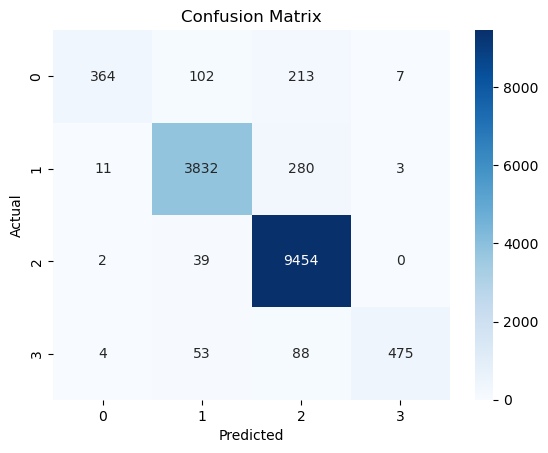

In [56]:
 #Plotting a confusion matrix to see correct vs incorrect predictions:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# let's visualize how well our model performed!

In [57]:
import joblib
joblib.dump(rf_model, "hotel_booking_model.pkl")  # Save model


['hotel_booking_model.pkl']

In [ ]:
#we can aslso load it using joblib.load("hotel_booking_model.pkl").